# __Fast Fourier Transform (FFT)__

In [2]:
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import numpy as np

In [3]:
f=1000 #Hz
N_sample = 8197
N_div=64
t_gap = (1/(f*N_div))*10**6 #us

In [4]:
sine=[]
time=[]
for i in range(N_sample):
    sine.append(2*np.sin(2*np.pi*f*i*t_gap*10**-6))
    time.append(i*t_gap*(10**-6))

In [9]:
freq=fftfreq(N_sample,time[1]-time[0])*2*np.pi
sine_fft=fft(sine)

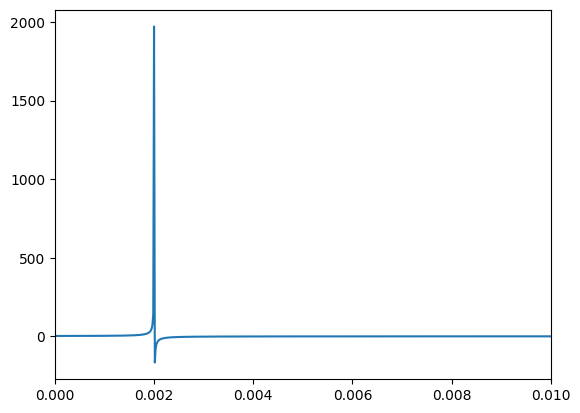

In [11]:
# plt.plot(time,sine)
plt.plot(time,sine_fft)
plt.xlim(0,0.01)
plt.show()